### load data

In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sebastian/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sebasti

In [2]:
sns.set_style("whitegrid")

In [3]:
base_dir = "experiments"
figure_dir = os.path.join(base_dir, "figures")
os.makedirs(figure_dir, exist_ok=True)

In [4]:
files = sorted(glob.glob(os.path.join(base_dir, "hl*epssched-exp*lrsched-None*/test_logs/*.json")))
files

['experiments/hl-0_eps-0.5_epssched-exp_lrsched-None/test_logs/results_all.json',
 'experiments/hl-2_eps-0.5_epssched-exp_lrsched-None/test_logs/results_all.json',
 'experiments/hl-4_eps-0.5_epssched-exp_lrsched-None/test_logs/results_all.json',
 'experiments/hl-6_eps-0.5_epssched-exp_lrsched-None_steps-500000/test_logs/results_all.json',
 'experiments/hl-8_eps-0.5_epssched-exp_lrsched-None_steps-500000/test_logs/results_all.json']

In [5]:
dfs = []
for f in files:
    with open(f, "r") as file:
        json_dict = json.load(file)
    name = f.split("/")[-3].split("_")[0][-1]
    json_dict["params"] = f"history length {name}"
    dfs.append(json_dict)

In [6]:
def plot_historgram(json_dicts, metric, title, save=None):
    for d in json_dicts:
        g = sns.distplot(d[metric], kde=False, label=d["params"])
    fig = g.get_figure()
    fig.suptitle(title, fontsize=14)
    plt.legend()
    if save is not None:
        fig.savefig(save)

In [7]:
def plot_histogram_grid(json_dicts, metric, title, save=None):
    dfs = []
    for d in json_dicts:
        df = pd.DataFrame()
        df[metric] = d[metric]
        df["params"] = d["params"]
        dfs.append(df)
    df = pd.concat(dfs)
    g = sns.FacetGrid(df, col="params")
    g.map(sns.distplot, metric, kde=False)
    g.fig.suptitle(title, fontsize=14)
    g.fig.subplots_adjust(top=0.8)
    if save is not None:
        g.fig.savefig(save)

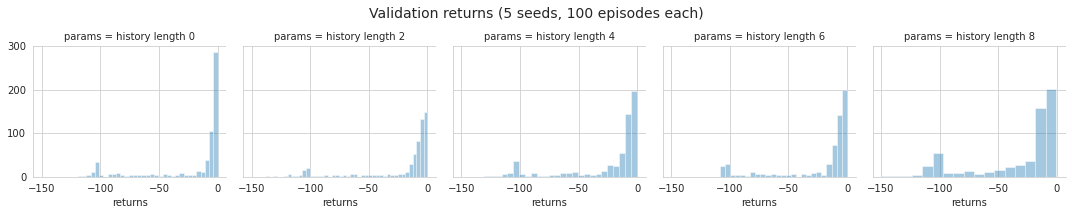

In [8]:
plot_histogram_grid(dfs, "returns", "Validation returns (5 seeds, 100 episodes each)", save=os.path.join(figure_dir, "validation_return_hist_grid.png"))

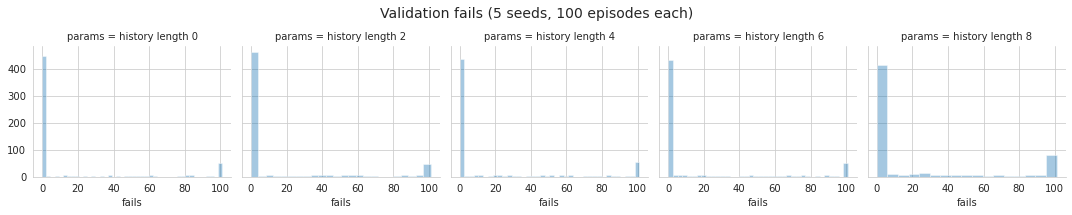

In [9]:
plot_histogram_grid(dfs, "fails", "Validation fails (5 seeds, 100 episodes each)", save=os.path.join(figure_dir, "validation_fails_hist_grid.png"))

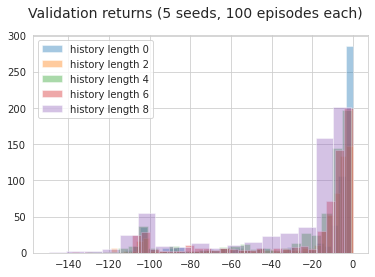

In [10]:
plot_historgram(dfs, "returns", "Validation returns (5 seeds, 100 episodes each)", save=os.path.join(figure_dir, "validation_return_hist.png"))

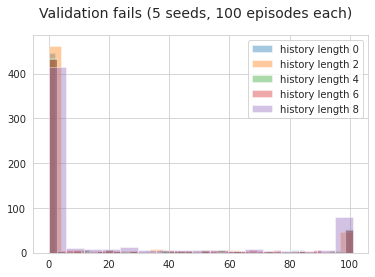

In [11]:
plot_historgram(dfs, "fails", "Validation fails (5 seeds, 100 episodes each)", save=os.path.join(figure_dir, "validation_fails_hist.png"))